# NLP and Preprocessing Techniques

## Introduction

Nous allons utiliser le dataset [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) pour nous entraîner au prétraitement (pre-processing) des données textuelles. L'ensemble de données contient des avis (reviews) d'utilisateurs pour de nombreux produits, mais nous nous concentrerons sur le produit qui a reçu le plus grand nombre de reviews - oatmeal cookie [cookie_reviews.csv](https://elearning.univ-constantine2.dz/elearning/mod/resource/view.php?id=71238)

Le code suivant vous aidera à charger les données.

In [70]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
# nltk.download() <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...


In [33]:
data = pd.read_csv('C:/Users/pc/Downloads/TP3_cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Question 1 ##

* Déterminez le nombre total de reviews.
* Déterminez le pourcentage de reviews avec 1, 2, 3, 4 et 5 étoiles (stars).
* Déterminer la distribution des longueurs de caractères pour les reviews (distribution of character lengths), en listant les valeurs (et en traçant un histogramme* : Optionnel).

In [34]:

tot_reviews = len(data)
print("Number is :", tot_reviews)


Number is : 913


In [35]:

stars = data['stars'].value_counts()

stars_percentage = stars / tot_reviews * 100
print("The percentage is :")
print(stars_percentage)


The percentage is :
stars
5    68.346112
4    23.767798
3     6.133625
2     1.314348
1     0.438116
Name: count, dtype: float64


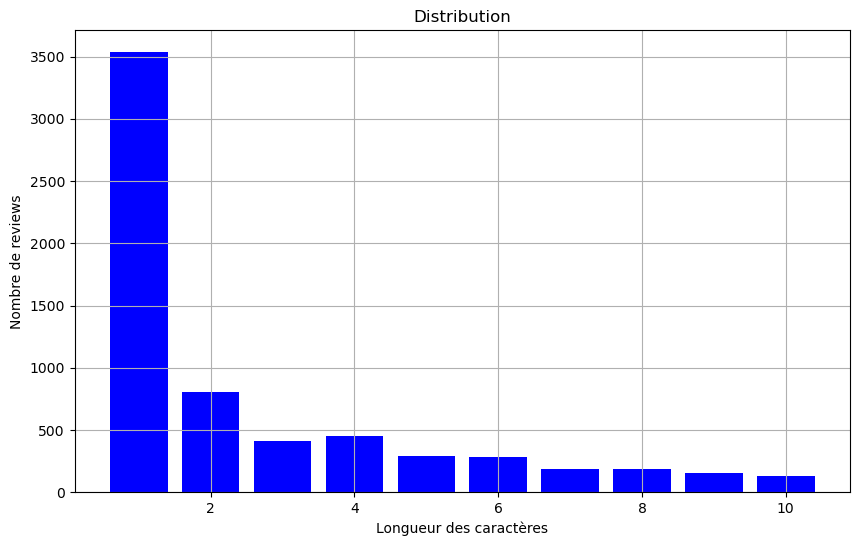

In [58]:
character_lengths = data['reviews'].apply(len)
character_lengths_counts = character_lengths.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(character_lengths_counts.values,character_lengths_counts.index, color='blue')
plt.xlabel('Longueur des caractères')
plt.ylabel('Nombre de reviews')
plt.title('Distribution')
plt.grid(True)
plt.show()


## Question 2 ##

* Appliquer les étapes de prétraitement suivantes :

     1. Remove all numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into tokens
     
  Hint #1: Use regular expressions.
  
  Hint #2: Le review dans la deuxième ligne comporte des chiffres, des lettres majuscules et des signes de ponctuation. Vous pouvez l'utiliser pour tester vos expressions régulières.
     
     
* Trouver les mots les plus fréquents.
* Déterminer la distribution de la longueur des mots (word length distribution) sur l'ensemble du corpus.

In [50]:
import re
import string

def preprocess_review(review):
    
    review = re.sub(r'\d+', '', review)
  
    review = review.lower()
   
    translation_table = str.maketrans('', '', string.punctuation)
    review = review.translate(translation_table)
    return review

data['processed_reviews'] = data['reviews'].apply(preprocess_review)


In [52]:
data


,user_id,stars,reviews,processed_reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...,i love these cookies not only are they health...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...,my kids loved these i was very pleased to give...
...,...,...,...,...
908,A366PSH7KFLRPB,5,I loved these cookies and so did my kids. You ...,i loved these cookies and so did my kids you c...
909,A2KV6EYQPKJRR5,5,This is a great tasting cookie. It is very sof...,this is a great tasting cookie it is very soft...
910,A3O7REI0OSV89M,4,These are great for a quick snack! They are sa...,these are great for a quick snack they are sat...
911,A9JS5GQQ6GIQT,5,I love the Quaker soft baked cookies. The rea...,i love the quaker soft baked cookies the real...


In [55]:
all_words = ' '.join(data['processed_reviews'])
tokens = word_tokenize(all_words)
tokens

['i',
 'love',
 'these',
 'cookies',
 'not',
 'only',
 'are',
 'they',
 'healthy',
 'but',
 'they',
 'taste',
 'great',
 'and',
 'are',
 'so',
 'soft',
 'i',
 'will',
 'definitely',
 'add',
 'these',
 'to',
 'my',
 'grocery',
 'list',
 'quaker',
 'soft',
 'baked',
 'oatmeal',
 'cookies',
 'with',
 'raisins',
 'are',
 'a',
 'delicious',
 'treat',
 'great',
 'for',
 'anytime',
 'of',
 'day',
 'for',
 'examplebr',
 'br',
 'at',
 'breakfast',
 'i',
 'had',
 'one',
 'with',
 'a',
 'large',
 'banana',
 'and',
 'a',
 'cup',
 'of',
 'coffee',
 'and',
 'felt',
 'id',
 'had',
 'a',
 'relatively',
 'healthy',
 'start',
 'to',
 'the',
 'daybr',
 'br',
 'the',
 'next',
 'day',
 'at',
 'lunch',
 'following',
 'a',
 'tuna',
 'sandwich',
 'i',
 'had',
 'one',
 'with',
 'a',
 'glass',
 'of',
 'milk',
 'and',
 'was',
 'satisfied',
 'enough',
 'to',
 'not',
 'need',
 'a',
 'snack',
 'before',
 'dinner',
 'at',
 'br',
 'br',
 'the',
 'following',
 'night',
 'after',
 'dinner',
 'i',
 'had',
 'one',
 'with

In [57]:
word_freq = Counter(tokens)
most_common_word = word_freq.most_common(1)
print("most common word:", most_common_word)

Le mot le plus frequent: [('i', 2003)]


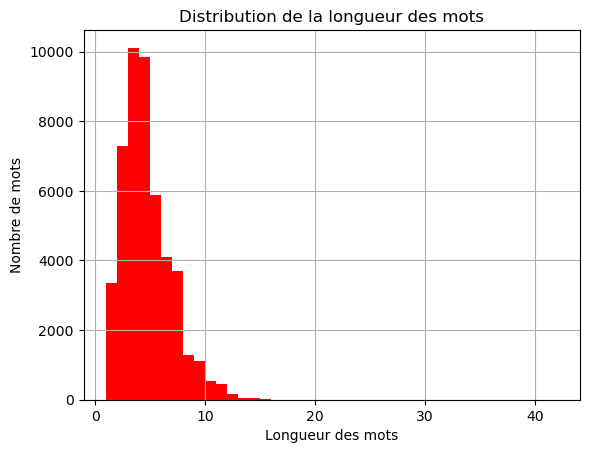

In [60]:
word_lengths = [len(word) for word in tokens]
plt.hist(word_lengths, bins=range(min(word_lengths), max(word_lengths) + 1), color='red')
plt.xlabel('Longueur des mots')
plt.ylabel('Nombre de mots')
plt.title('Distribution de la longueur des mots')
plt.grid(True)
plt.show()

## Question 3 ##

* Appliquer les techniques de prétraitement suivantes :

     * Remove stopwords
     * Stemming
     * *Optional: Lemmatization

  **Recommandation :** Créez une nouvelle colonne dans votre ensemble de données (dataframe) pour chaque technique de prétraitement que vous appliquez, afin de voir la progression du texte des reviews.

In [77]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_stemming(review):
    # Tokenization
    tokens = nltk.word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    return stemmed_tokens

def preprocess_lemmatization(review):
    # Tokenization
    tokens = nltk.word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    return lemmatized_tokens
data['stemmed_reviews'] = data['processed_reviews'].apply(preprocess_stemming)
data['lemmatized_reviews'] = data['processed_reviews'].apply(preprocess_lemmatization)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
print(data)

            user_id  stars                                            reviews  \
0    A368Z46FIKHSEZ      5  I love these cookies!  Not only are they healt...   
1    A1JAPP1CXRG57A      5  Quaker Soft Baked Oatmeal Cookies with raisins...   
2    A2Z9JNXPIEL2B9      5  I am usually not a huge fan of oatmeal cookies...   
3    A31CYJQO3FL586      5  I participated in a product review that includ...   
4    A2KXQ2EKFF3K2G      5  My kids loved these. I was very pleased to giv...   
..              ...    ...                                                ...   
908  A366PSH7KFLRPB      5  I loved these cookies and so did my kids. You ...   
909  A2KV6EYQPKJRR5      5  This is a great tasting cookie. It is very sof...   
910  A3O7REI0OSV89M      4  These are great for a quick snack! They are sa...   
911   A9JS5GQQ6GIQT      5  I love the Quaker soft baked cookies.  The rea...   
912   AMAVEZAGCH52H      5  This cookie is really good and works really we...   

                           

## Question 4 ##

In [79]:
from collections import Counter

stemmed_words = [word for review in data['stemmed_reviews'] for word in review]
stemmed_word_freq = Counter(stemmed_words)
most_common_stemmed_words = stemmed_word_freq.most_common(1)

print("Le mot :", most_common_stemmed_words)

lemmatized_words = [word for review in data['lemmatized_reviews'] for word in review]
lemmatized_word_freq = Counter(lemmatized_words)
most_common_lemmatized_words = lemmatized_word_freq.most_common(1)

print("Le mot :", most_common_lemmatized_words)


Le mot : [('cooki', 1660)]
Le mot : [('cooky', 835)]


* Après ces étapes de prétraitement, quels sont maintenant les termes les plus fréquents ? Est-ce qu'ils ont plus de sens ?